### Step 1: Understanding the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "Japan_used_cars_datasets.csv"
df = pd.read_csv(file_path)

In [2]:
# Display basic information about the dataset
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [3]:
print(df['mark'].unique())

['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land rover' 'peugeot' 'hyundai' 'kia motors' 'audi'
 'citroen' 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']


In [4]:
print(df['model'].unique())

['march' 'lafesta' 'avensis' 'mira' 'passat' 'bongo van' 'step wgn'
 'sambar' 'inspire' 'mercedes-benz others' 'note' 'passo' 'impreza'
 'kubota others' 'life' 'progres' 'cube cubic' 'cube' 'a-class' 'coltplus'
 'mr wagon' 'pajero mini' 'fit' 'legacy b4' 'vitz' 'mark ii blit'
 'insight' 'move' 'tanto' 'terios kid' 'az-wagon' 'coo' 'verisa' 'swift'
 'delica d2' 'tiida' 'sienta' 'mini' 'colt' 'platz' 'bluebird sylphy'
 'eclipse' 'bb' 'moco' 'clipper truck' 'esse' 'ek wagon' 'polo' 'x-trail'
 'atenza sport' 'ad van' 'pixis space' 'freed spike' 'stream' 'alto'
 'raum' 'wish' 'every' 'demio' 'jimny' 'premacy' 'cr-v' 'lapin' 'delica'
 'wagon r' 'lancer' 'naked' 'odyssey' 'ractis' 'porte' 'corolla rumion'
 'tiida latio' 'voxy' 'carol' 'sunny' 'bongo truck' 'boon' 's-mx'
 'pt cruiser' 'golf' 'ad expert' 'fit hybrid' 'serena' 'edix'
 'move custom' 'impreza anesis' 'estima' 'carry truck' 'solio' 'mpv'
 'vanette van' 'accord' 'tribute' 'pajero io' 'noah' 'vanette truck'
 'delica truck' 'lancer ca

In [5]:
df.info

<bound method DataFrame.info of         id  price      mark     model  year  mileage  engine_capacity  \
0        0     80    nissan     march  2003    80000             1240   
1        1    110    nissan     march  2010    53000             1200   
2        2    165    nissan   lafesta  2005    47690             2000   
3        3    190    toyota   avensis  2008   130661             1990   
4        4    190  daihatsu      mira  2006    66300              660   
...    ...    ...       ...       ...   ...      ...              ...   
2313  2331   1400    toyota      vitz  2009   121000              996   
2314  2332   1400    toyota    estima  2003   101000             3000   
2315  2333   1400    subaru        r2  2005   101000              660   
2316  2334   1400     honda         z  2000   170000              660   
2317  2335   1400    toyota  estima t  2005    72320             3000   

     transmission drive hand_drive      fuel  
0              at   2wd        rhd  gasoline

##### Dataset Overview
##### The dataset contains 2,318 rows and 11 columns, including:

1. Target Variable: price (integer)
2. Features:
    * mark, model (Categorical - Brand & Model of the car)
    * year (Integer - Manufacturing year)
    * mileage (Integer - Distance traveled)
    * engine_capacity (Integer - Engine size in cc)
    * transmission (Categorical - at for automatic, mt for manual)
    * drive (Categorical - 2wd, 4wd, etc.)
    * hand_drive (Categorical - rhd for right-hand drive, lhd for left-hand drive)
    * fuel (Categorical - gasoline, diesel, etc.)
    * Extra Column: id (Unique identifier, can be dropped)

### Step 2: Data Preprocessing

* Drop id column (not useful for prediction).
* Convert categorical variables into numerical values.
* Check for outliers in price, mileage, and engine_capacity.
* Normalize numerical features if necessary.

In [6]:
# Drop the 'id' column as it is not useful for prediction
df.drop(columns=['id'], inplace=True)

In [7]:
df.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features using LabelEncoder
categorical_cols = ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Check for outliers in price, mileage, and engine_capacity using summary statistics
df.describe()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,19.411993,147.894305,2005.972390,100013.194996,1507.010785,0.113891,0.087144,1.992235,1.998274
std,288.673112,7.132919,68.563361,3.698863,52512.478883,549.585170,0.449395,0.289655,0.092583,0.149799
min,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,2.000000,2.000000
50%,1000.000000,24.000000,146.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,2.000000,2.000000
75%,1213.000000,25.000000,204.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,2.000000,2.000000
max,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


##### Observations:
1. price ranges from 80 to 1400 (No extreme outliers).
2. mileage ranges up to 790,000, which might have outliers.
3. engine_capacity has a max value of 12,340, which is unusual (potential data issue).


In [9]:
# Remove outliers using the IQR method for 'mileage' and 'engine_capacity'
Q1_mileage, Q3_mileage = df['mileage'].quantile([0.25, 0.75])
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

Q1_engine, Q3_engine = df['engine_capacity'].quantile([0.25, 0.75])
IQR_engine = Q3_engine - Q1_engine
lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

In [10]:
# Filtering out outliers
df_filtered = df[(df['mileage'] >= lower_bound_mileage) & (df['mileage'] <= upper_bound_mileage)]
df_filtered = df_filtered[(df_filtered['engine_capacity'] >= lower_bound_engine) & 
                          (df_filtered['engine_capacity'] <= upper_bound_engine)]


In [11]:
# Display the updated data statistics
df_filtered.describe()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,971.021963,19.444644,149.097714,2006.026894,95714.730166,1468.357239,0.112057,0.082026,1.993725,1.996414
std,288.121213,7.158830,68.239366,3.620469,40782.813020,441.847652,0.445196,0.282517,0.078985,0.119737
min,80.000000,0.000000,0.000000,1982.000000,2000.000000,550.000000,0.000000,0.000000,1.000000,0.000000
25%,777.000000,15.000000,104.000000,2004.000000,66000.000000,1297.000000,0.000000,0.000000,2.000000,2.000000
50%,1000.000000,24.000000,153.000000,2006.000000,92000.000000,1490.000000,0.000000,0.000000,2.000000,2.000000
75%,1213.000000,25.000000,205.000000,2009.000000,121000.000000,1700.000000,0.000000,0.000000,2.000000,2.000000
max,1400.000000,27.000000,257.000000,2015.000000,208434.000000,2520.000000,2.000000,2.000000,2.000000,4.000000


### Step 3: Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

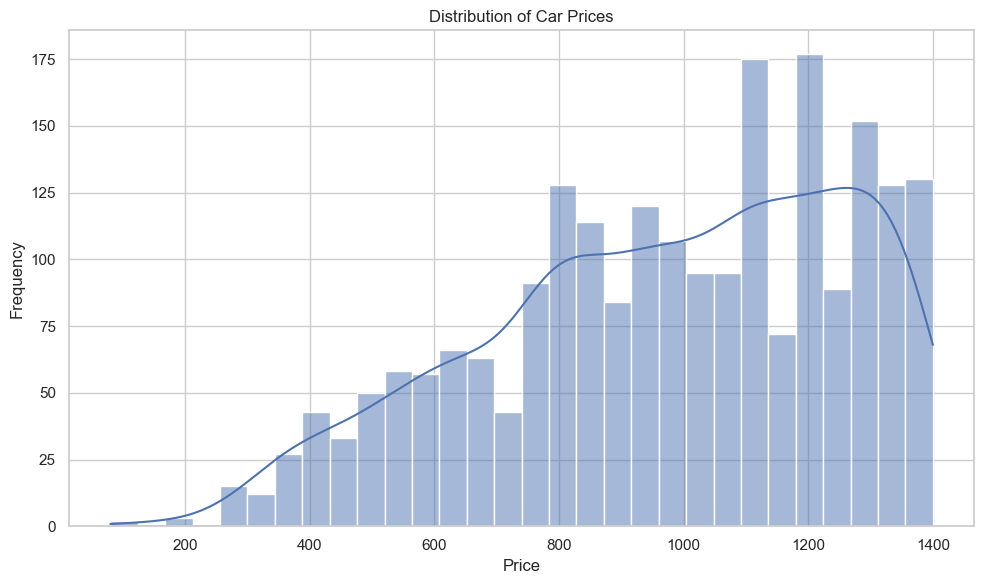

In [13]:
# 1. Distribution of the target variable (price)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

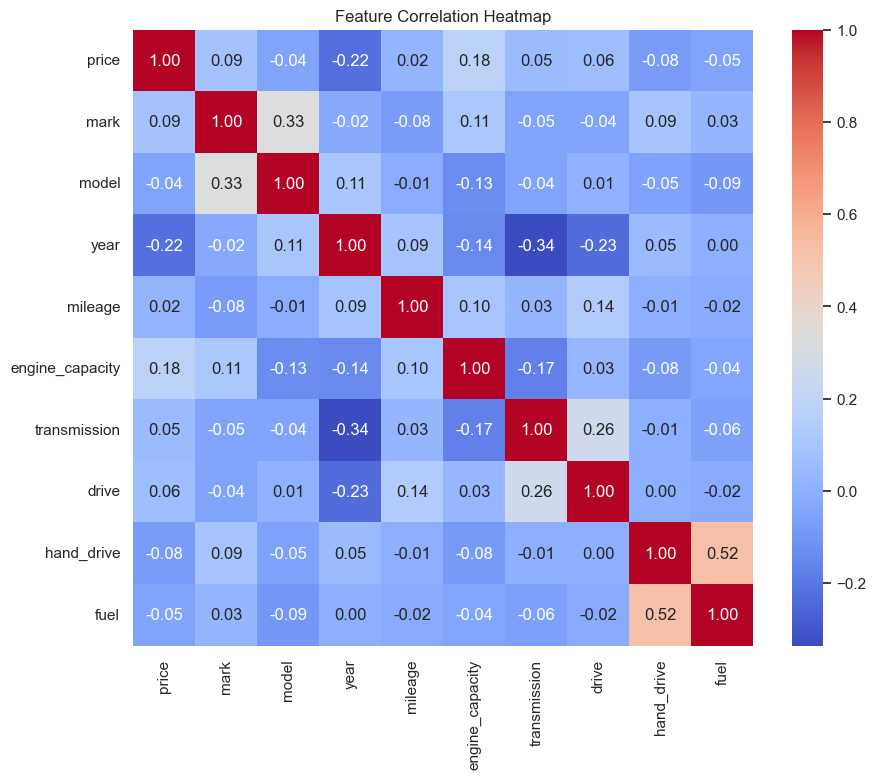

In [14]:
plt.figure(figsize=(10, 8))
corr_matrix = df_filtered.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Step 4: Model Selection & Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [16]:
# Define features and target variable
X = df_filtered.drop(columns=['price'])  # Features
y = df_filtered['price']  # Target

In [17]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [19]:
# Train and evaluate models
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_scores[name] = r2_score(y_test, y_pred)

model_scores

{'Linear Regression': 0.10296419312011518,
 'Decision Tree': -0.26435303732897997,
 'Random Forest': 0.33674323861147026,
 'Gradient Boosting': 0.29079988796016354,
 'XGBoost': 0.2878143787384033}

### Step 5: Model Evaluation & Selection

In [20]:
# Print model scores
print("Model Performance (R² Scores):")
for name, score in model_scores.items():
    print(f"{name}: {score:.4f}")

Model Performance (R² Scores):
Linear Regression: 0.1030
Decision Tree: -0.2644
Random Forest: 0.3367
Gradient Boosting: 0.2908
XGBoost: 0.2878


### Step 6: Save the Best Model

In [21]:
import joblib

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

# Save the best model to a file
joblib.dump(best_model, "best_car_price_model.pkl")

print(f"\nSaved the best model: {best_model_name}")



Saved the best model: Random Forest
